# Análisis General - Texto

En la siguiente sección se realiza un análisis a todas las columnas vinculadas con el texto del tweet (text, length).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
# Replico la estructura de los tweets.
tweets = spotify_songs = pd.read_csv('Data/train.csv')
tweets['length'] = tweets['text'].str.len()
tweets['located'] = tweets['location'].notnull().astype(int)
tweets['location_length'] = tweets['location'].str.len()
tweets['location_length'].fillna(0, inplace=True)
tweets['has_keyword'] = tweets['keyword'].notnull().astype(int)
tweets['keyword_length'] = tweets['keyword'].str.len()
tweets['keyword_length'].fillna(0, inplace=True)
tweets['tweet_length'] = tweets['length'] + tweets['location_length'] + tweets['keyword_length']
tweets.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,0.0,0,0.0,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0.0,0,0.0,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0.0,0,0.0,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,0.0,0,0.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0.0,0,0.0,88.0


## Palabras más utilizadas
A continuación se hace una lista de las 60 palabras más utilizadas en el texto de los tweets.

In [27]:
# Me quedo solo con la column de texto.
text = tweets['text']

# Divido cada texto en sus palabras.
text = text.str.split(' ')

# Recorro la serie y genero una lista con todas las palabras.
all_words = [word for row in text for word in row]

# Genero una serie con la lista de palabras.
words = pd.Series(all_words)

# Hago un value_counts para obtener las más utilizadas y las menos utilizadas.
# Por un tema visual lo paso a un nuevo dataframe.
words_count = words.value_counts().to_frame().reset_index()
words_count.columns = ['word', 'count']

words_count.head(60)

,word,count
0,the,2573
1,a,1840
2,to,1804
3,in,1757
4,of,1721
5,and,1301
6,I,1186
7,for,820
8,is,814
9,on,773


Muchas de las palabras más utilizadas son preposisiones y/o palabras cortas.

## Palabras menos utilizadas
Lista de las 60 palabras menos utilizadas:

In [28]:
words_count.tail(60)

,word,count
31957,http://t.co/3w0pxFyyri,1
31958,stores.,1
31959,miniature,1
31960,Lanes,1
31961,Matthew,1
31962,http://t.co/aUoeyIRqE6,1
31963,2:,1
31964,\nhttp://t.co/i1EeUxxZ3A,1
31965,logically,1
31966,that..not,1


En el caso de las menos usadas, hay muchas palabras que son simplemente links, otras mal escritas, otras que son menciones a otras cuentas y otras que no tienen sentido.

## WordCloud
Se realiza un WordCloud con la lista de palabras:

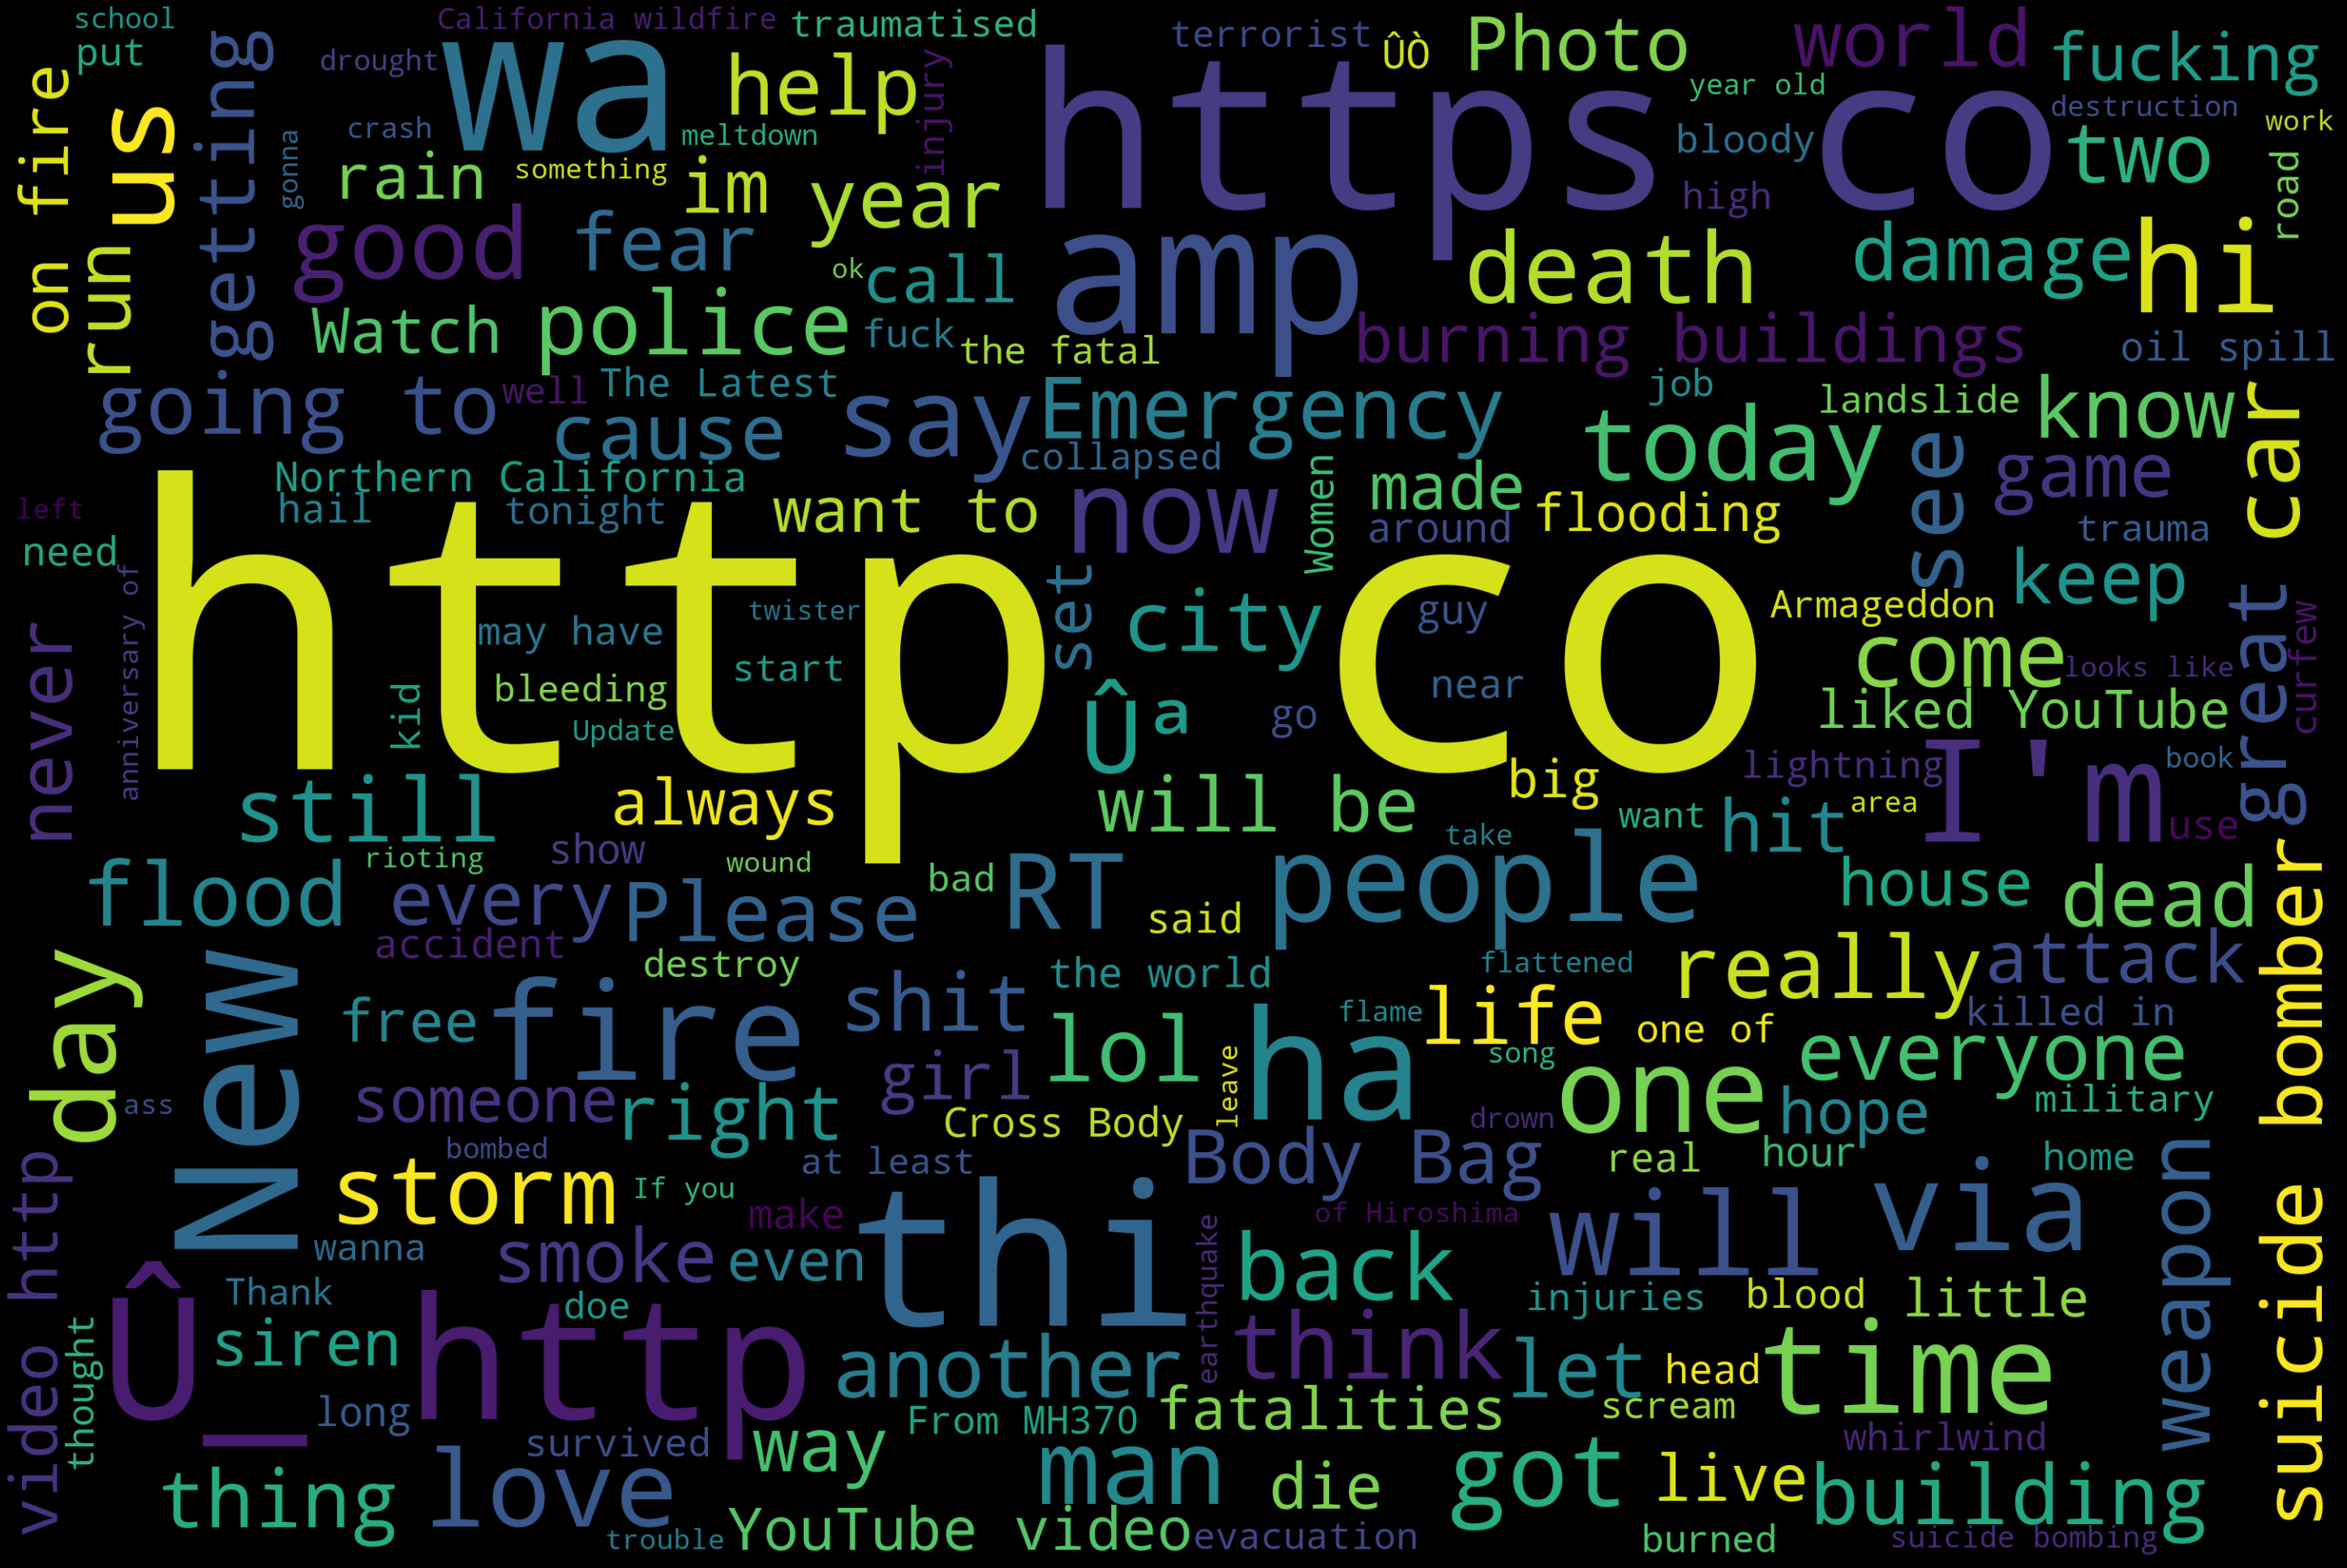

In [29]:
text = " ".join(text for text in tweets['text'])
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Longitud del texto
A continuación se analiza la longitud del texto.
Lista de las longitudes con mayor ocurrencia:

In [40]:
text_length_counts = tweets['length'].value_counts().to_frame().reset_index()
text_length_counts.columns = ['length', 'count']
text_length_counts.describe()

,length,count
count,147.000000,147.000000
mean,80.027211,51.789116
std,42.627560,52.260836
min,7.000000,1.000000
25%,43.500000,23.000000
50%,80.000000,45.000000
75%,116.500000,66.500000
max,157.000000,401.000000


### Longitudes con mayores cantidades de ocurrencias
Lista de las 30 longitudes con mayor ocurrencia:

In [42]:
text_length_counts.head(30)

,length,count
0,136,401
1,139,275
2,138,256
3,140,218
4,137,210
5,135,191
6,134,128
7,133,114
8,132,113
9,130,91


La longitud que más se repite es la 136, mientras que las longitudes entre 130 y 140 son las que predominan en cuanto a ocurrencias.

### Longitudes con mayores cantidades de ocurrencias
Lista de las 30 longitudes con menor ocurrencia:

In [43]:
text_length_counts.tail(30)

,length,count
117,29,17
118,18,14
119,22,14
120,28,13
121,24,12
122,19,11
123,30,11
124,23,10
125,146,9
126,20,9


Las longitudes con menor frecuencia son aquellas que son menores o igual a 30 y aquellas mayores a 140.

### Histograma de la longitud
Se realiza un histograma de la longitud:

Text(0, 0.5, 'Frecuencia')

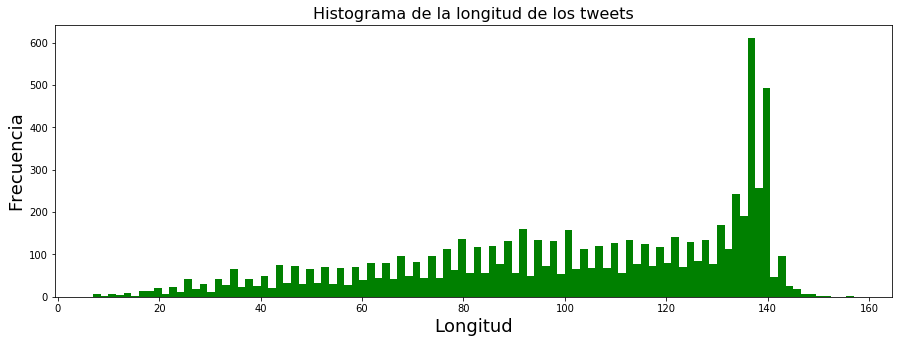

In [45]:
# Realizo un histograma de la distribución de la longitud de los tweets.
tweets_hist = tweets['length'].plot.hist(bins=100, color='green', figsize=(15,5))
tweets_hist.set_title("Histograma de la longitud de los tweets", fontsize=16)
tweets_hist.set_xlabel("Longitud",fontsize=18)
tweets_hist.set_ylabel("Frecuencia",fontsize=18)

El histograma avala todo el análisis que se realizó a partir de las tablas de longitudes con mayor y menor frecuencia: el pico se encuentra en 136, los valores con mayores frecuencias están entre 130 y 140 caracteres mientras que los de menor frecuencia o son mayores a 145 o menores a 30.

## Tweet repetidos
En este apartado se estudiará si existen tweets con diferentes ids pero con texto repetido.

In [56]:
repeated_tweets = tweets['text'].value_counts().to_frame().reset_index()
repeated_tweets.columns = ['text', 'count']
repeated_tweets = repeated_tweets[repeated_tweets['count'] > 1]
repeated_tweets.describe()

,count
count,69.000000
mean,2.594203
std,1.342943
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


In [57]:
repeated_tweets.head(60)

,text,count
0,11-Year-Old Boy Charged With Manslaughter of T...,10
1,He came to a land which was engulfed in tribal...,6
2,#Bestnaijamade: 16yr old PKK suicide bomber wh...,6
3,The Prophet (peace be upon him) said 'Save you...,6
4,Madhya Pradesh Train Derailment: Village Youth...,5
5,To fight bioterrorism sir.,4
6,.POTUS #StrategicPatience is a strategy for #G...,4
7,VIDEO: 'We're picking up bodies from water': R...,4
8,that horrible sinking feeling when youÛªve be...,4
9,Beware of your temper and a loose tongue! Thes...,3


In [58]:
repeated_tweets.tail(10)

,text,count
59,UD: Rescue (Structural Collapse) - Scott Road ...,2
60,Schools in Western Uganda still Burning down B...,2
61,#Myanmar Displaced #Rohingya at #Sittwe point...,2
62,Families to sue over Legionnaires: More than 4...,2
63,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,2
64,Experts in France begin examining airplane deb...,2
65,wowo--=== 12000 Nigerian refugees repatriated ...,2
66,@_minimehh @cjoyner I must be overlooking the ...,2
67,that exploded &amp; brought about the\nbeginni...,2
68,#stormchase Violent Record Breaking EF-5 El Re...,2


Es llamativo que existan tweets repetidos, más adelante se analizarán con más claridad estos casos.

## Tweets con links, hashtag y/o menciones
Entre las funcionalidades de Twitter se encuentran 3 que pueden aplicarse al texto del tweet: insertar un link a otra web, realizar un hashtag anteponiendo el carácter # al texto del hashtag y mencionar otra cuenta de Twitter anteponiendo el carácter @ al nombre de usuario al que se hace mención.\
Se analizarán aquellos tweets que contengan alguna de estas 3 funciones.

### Links
Para filtrar los tweets que contengan algún link se busca en el texto la palabra 'http'.\
Se encuentran 3971 tweets que referencian a algún link externo.\
Se hace un describe sobre este nuevo set de datos:

In [64]:
tweets_links = tweets[tweets['text'].str.contains('http')]
tweets_links.describe()

,id,target,length,located,location_length,has_keyword,keyword_length,tweet_length
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,5526.547469,0.546965,110.103500,0.683959,9.083354,0.994963,8.901032,128.087887
std,3111.104089,0.497852,26.249397,0.464988,8.381421,0.070798,3.573979,28.154970
min,48.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,2916.500000,0.000000,91.000000,0.000000,0.000000,1.000000,7.000000,108.000000
50%,5565.000000,1.000000,115.000000,1.000000,8.000000,1.000000,8.000000,132.000000
75%,8090.000000,1.000000,135.000000,1.000000,15.000000,1.000000,10.000000,151.000000
max,10873.000000,1.000000,148.000000,1.000000,42.000000,1.000000,21.000000,188.000000


Al comparar el describe de este set de datos con el set de datos general, vemos los siguientes cambios en los valores medios de las columnas:
- Valor medio de la columna target: aumento 0.42966 a 0.546965.
- Valor medio de la columna length: aumento de 101.037436 a 110.103500.
- Valor medio de la columna located: aumento de 0.667280 a 0.683959.
- Valor medio de la columna location_length: disminución de 9.105477 a 9.083354.
- Valor medio de la columna has_keyword: aumento de 0.991987 a 0.994963.
- Valor medio de la columna keyword_length: aumento de 8.667148 a 8.901032.
- Valor medio de la columna tweet_length: aumento de 118.810062 a 128.087887.

### Hashtag
Se considera que un tweet tiene un hashtag si el mismo tiene en su texto un carácter # seguido de un texto.\
Existen 1761 registros en donde el texto tiene un hashtag:

In [71]:
tweets_hashtag = tweets[tweets['text'].str.contains('#.*?(?=\s|$)')]
tweets_hashtag.describe()

,id,target,length,located,location_length,has_keyword,keyword_length,tweet_length
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,5396.038047,0.496877,113.893242,0.703010,9.457694,0.988075,8.796139,132.147076
std,3137.851032,0.500132,25.712218,0.457062,8.424299,0.108580,3.697651,27.619029
min,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,2832.000000,0.000000,98.000000,0.000000,0.000000,1.000000,7.000000,114.000000
50%,5403.000000,0.000000,121.000000,1.000000,9.000000,1.000000,8.000000,138.000000
75%,8013.000000,1.000000,136.000000,1.000000,15.000000,1.000000,10.000000,153.000000
max,10867.000000,1.000000,149.000000,1.000000,37.000000,1.000000,21.000000,188.000000


Al igual que para los links, comparamos con los valores del describe general:
- Valor medio de la columna target: aumento 0.42966 a 0.496877.
- Valor medio de la columna length: aumento de 101.037436 a 113.893242.
- Valor medio de la columna located: aumento de 0.667280 a 0.703010.
- Valor medio de la columna location_length: aumento de 9.105477 a 9.457694.
- Valor medio de la columna has_keyword: disminución de 0.991987 a 0.988075.
- Valor medio de la columna keyword_length: aumento de 8.667148 a 8.796139.
- Valor medio de la columna tweet_length: aumento de 118.810062 a 132.147076.

### Menciones
Se considera que un tweet tiene una mención si tiene el carácter @ seguido de un texto.\
Existen 2039 registros en donde el texto tiene una mención:

In [76]:
tweets_mentions = tweets[tweets['text'].str.contains('@.*?(?=\s|$)')]
tweets_mentions.describe()

,id,target,length,located,location_length,has_keyword,keyword_length,tweet_length
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,5305.867092,0.331535,101.921040,0.711623,10.256498,0.999019,8.633154,120.810692
std,3144.427485,0.470880,34.198823,0.453118,8.880044,0.031311,3.393956,36.424017
min,48.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,2459.000000,0.000000,78.000000,0.000000,0.000000,1.000000,6.000000,94.500000
50%,5383.000000,0.000000,109.000000,1.000000,10.000000,1.000000,8.000000,128.000000
75%,8016.500000,1.000000,133.000000,1.000000,16.000000,1.000000,10.000000,150.000000
max,10870.000000,1.000000,151.000000,1.000000,47.000000,1.000000,21.000000,193.000000
